In [2]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import os

In [3]:
all_simu_dir = '/condo/wanglab/shared/wxc/clip/data/human/ST_data/simulation_data/'

In [4]:
raw_data_name = '10X_Visium_Barkley2022Cancer_GSM6177599_NYU_BRCA0_Vis_processed_data'

In [5]:
simu_dataset_dir = all_simu_dir+raw_data_name+'/'

# Omiclip

In [6]:
result_dir = simu_dataset_dir+'omiclip_results/'

## ST to ST

In [37]:
omiclip_distance = pd.DataFrame()
for level in ['lowly', 'medium', 'highly']:
    distance = pd.read_csv(result_dir+level+'_noisy_omiclip_aligned_st_to_st_distance.csv', index_col=0)
    distance.columns = distance.columns+'_'+level
    omiclip_distance = pd.concat([omiclip_distance, distance], axis=1)

In [39]:
omiclip_distance

,dist_raw_lowly,dist_homo_lowly,dist_raw_medium,dist_homo_medium,dist_raw_highly,dist_homo_highly
/condo/wanglab/shared/wxc/clip/data/human/ST_data/simulation_data/data31_spatial_fresh_frozen_35sample_V19T26-028_C1/adata_layer_1_nb0.03_ang3.53_cut0.02.h5ad,6.173204,4.924094,NaN,NaN,NaN,NaN
/condo/wanglab/shared/wxc/clip/data/human/ST_data/simulation_data/data31_spatial_fresh_frozen_35sample_V19T26-028_C1/adata_layer_1_nb0.01_ang-3.53_cut0.02.h5ad,4.780134,3.339986,NaN,NaN,NaN,NaN
/condo/wanglab/shared/wxc/clip/data/human/ST_data/simulation_data/data31_spatial_fresh_frozen_35sample_V19T26-028_C1/adata_layer_1_nb0.01_ang-0.65_cut0.01.h5ad,3.225711,1.827854,NaN,NaN,NaN,NaN
/condo/wanglab/shared/wxc/clip/data/human/ST_data/simulation_data/data31_spatial_fresh_frozen_35sample_V19T26-028_C1/adata_layer_1_nb0.04_ang-4.86_cut0.01.h5ad,5.567318,5.027297,NaN,NaN,NaN,NaN
/condo/wanglab/shared/wxc/clip/data/human/ST_data/simulation_data/data31_spatial_fresh_frozen_35sample_V19T26-028_C1/adata_layer_1_nb0.01_ang4.45_cut0.03.h5ad,12.268621,10.192708,NaN,NaN,NaN,NaN
/condo/wanglab/shared/wxc/clip/data/human/ST_data/simulation_data/data31_spatial_fresh_frozen_35sample_V19T26-028_C1/adata_layer_1_nb0.02_ang-1.27_cut0.01.h5ad,3.388924,1.733725,NaN,NaN,NaN,NaN
/condo/wanglab/shared/wxc/clip/data/human/ST_data/simulation_data/data31_spatial_fresh_frozen_35sample_V19T26-028_C1/adata_layer_1_nb0.03_ang0.54_cut0.02.h5ad,4.766435,3.138324,NaN,NaN,NaN,NaN
/condo/wanglab/shared/wxc/clip/data/human/ST_data/simulation_data/data31_spatial_fresh_frozen_35sample_V19T26-028_C1/adata_layer_1_nb0.03_ang1.01_cut0.02.h5ad,4.566756,2.812002,NaN,NaN,NaN,NaN
/condo/wanglab/shared/wxc/clip/data/human/ST_data/simulation_data/data31_spatial_fresh_frozen_35sample_V19T26-028_C1/adata_layer_1_nb0.02_ang-1.59_cut0.01.h5ad,3.956701,2.316846,NaN,NaN,NaN,NaN
/condo/wanglab/shared/wxc/clip/data/human/ST_data/simulation_data/data31_spatial_fresh_frozen_35sample_V19T26-028_C1/adata_layer_1_nb0.04_ang-0.70_cut0.01.h5ad,4.718221,3.337439,NaN,NaN,NaN,NaN


/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/sit

<Axes: >

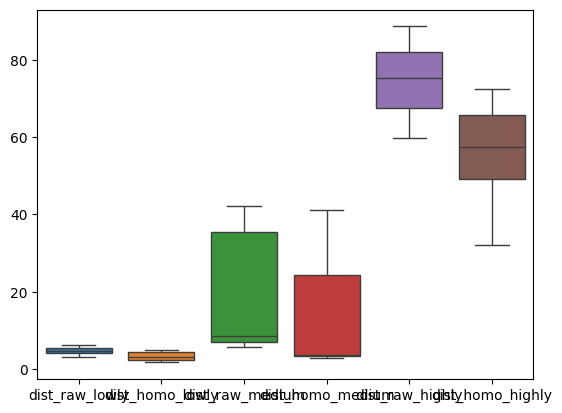

In [38]:
sns.boxplot(omiclip_distance, showfliers=False)

## Img to ST

In [40]:
omiclip_distance = pd.DataFrame()
for level in ['lowly', 'medium', 'highly']:
    distance = pd.read_csv(result_dir+level+'_noisy_omiclip_aligned_img_to_st_distance.csv', index_col=0)
    distance.columns = distance.columns+'_'+level
    omiclip_distance = pd.concat([omiclip_distance, distance], axis=1)

In [41]:
omiclip_distance

,dist_raw_lowly,dist_homo_lowly,dist_raw_medium,dist_homo_medium,dist_raw_highly,dist_homo_highly
/condo/wanglab/shared/wxc/clip/data/human/ST_data/simulation_data/data31_spatial_fresh_frozen_35sample_V19T26-028_C1/adata_layer_1_nb0.03_ang3.53_cut0.02.h5ad,26.877514,20.267908,NaN,NaN,NaN,NaN
/condo/wanglab/shared/wxc/clip/data/human/ST_data/simulation_data/data31_spatial_fresh_frozen_35sample_V19T26-028_C1/adata_layer_1_nb0.01_ang-3.53_cut0.02.h5ad,24.689494,18.645537,NaN,NaN,NaN,NaN
/condo/wanglab/shared/wxc/clip/data/human/ST_data/simulation_data/data31_spatial_fresh_frozen_35sample_V19T26-028_C1/adata_layer_1_nb0.01_ang-0.65_cut0.01.h5ad,20.575211,14.168339,NaN,NaN,NaN,NaN
/condo/wanglab/shared/wxc/clip/data/human/ST_data/simulation_data/data31_spatial_fresh_frozen_35sample_V19T26-028_C1/adata_layer_1_nb0.04_ang-4.86_cut0.01.h5ad,30.672967,24.327779,NaN,NaN,NaN,NaN
/condo/wanglab/shared/wxc/clip/data/human/ST_data/simulation_data/data31_spatial_fresh_frozen_35sample_V19T26-028_C1/adata_layer_1_nb0.01_ang4.45_cut0.03.h5ad,25.025511,16.393691,NaN,NaN,NaN,NaN
/condo/wanglab/shared/wxc/clip/data/human/ST_data/simulation_data/data31_spatial_fresh_frozen_35sample_V19T26-028_C1/adata_layer_1_nb0.02_ang-1.27_cut0.01.h5ad,25.903236,20.051245,NaN,NaN,NaN,NaN
/condo/wanglab/shared/wxc/clip/data/human/ST_data/simulation_data/data31_spatial_fresh_frozen_35sample_V19T26-028_C1/adata_layer_1_nb0.03_ang0.54_cut0.02.h5ad,28.436593,21.850422,NaN,NaN,NaN,NaN
/condo/wanglab/shared/wxc/clip/data/human/ST_data/simulation_data/data31_spatial_fresh_frozen_35sample_V19T26-028_C1/adata_layer_1_nb0.03_ang1.01_cut0.02.h5ad,28.001775,21.496947,NaN,NaN,NaN,NaN
/condo/wanglab/shared/wxc/clip/data/human/ST_data/simulation_data/data31_spatial_fresh_frozen_35sample_V19T26-028_C1/adata_layer_1_nb0.02_ang-1.59_cut0.01.h5ad,27.833734,22.091490,NaN,NaN,NaN,NaN
/condo/wanglab/shared/wxc/clip/data/human/ST_data/simulation_data/data31_spatial_fresh_frozen_35sample_V19T26-028_C1/adata_layer_1_nb0.04_ang-0.70_cut0.01.h5ad,30.344386,24.199516,NaN,NaN,NaN,NaN


/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/sit

<Axes: >

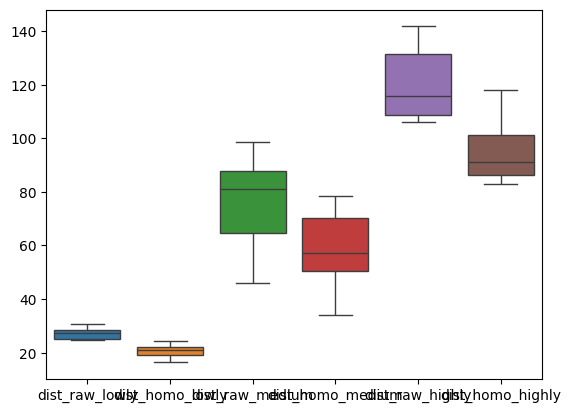

In [42]:
sns.boxplot(omiclip_distance, showfliers=False)

# Paste

In [7]:
result_dir = simu_dataset_dir+'paste_results/'

In [62]:
paste_distance = pd.DataFrame()
for level in ['lowly', 'medium', 'highly']:
    distance = pd.read_csv(result_dir+level+'_noisy_paste_aligned_distance.csv', index_col=0)
    distance.columns = distance.columns+'_'+level
    paste_distance = pd.concat([paste_distance, distance], axis=1)

In [63]:
paste_distance

,distance_lowly,distance_medium,distance_highly
/condo/wanglab/shared/wxc/clip/data/human/ST_data/simulation_data/data31_spatial_fresh_frozen_35sample_V19T26-028_C1/adata_layer_1_nb0.03_ang3.53_cut0.02.h5ad,624.870893,NaN,NaN
/condo/wanglab/shared/wxc/clip/data/human/ST_data/simulation_data/data31_spatial_fresh_frozen_35sample_V19T26-028_C1/adata_layer_1_nb0.01_ang-3.53_cut0.02.h5ad,332.757243,NaN,NaN
/condo/wanglab/shared/wxc/clip/data/human/ST_data/simulation_data/data31_spatial_fresh_frozen_35sample_V19T26-028_C1/adata_layer_1_nb0.01_ang-0.65_cut0.01.h5ad,70.457076,NaN,NaN
/condo/wanglab/shared/wxc/clip/data/human/ST_data/simulation_data/data31_spatial_fresh_frozen_35sample_V19T26-028_C1/adata_layer_1_nb0.04_ang-4.86_cut0.01.h5ad,626.053720,NaN,NaN
/condo/wanglab/shared/wxc/clip/data/human/ST_data/simulation_data/data31_spatial_fresh_frozen_35sample_V19T26-028_C1/adata_layer_1_nb0.01_ang4.45_cut0.03.h5ad,651.339129,NaN,NaN
/condo/wanglab/shared/wxc/clip/data/human/ST_data/simulation_data/data31_spatial_fresh_frozen_35sample_V19T26-028_C1/adata_layer_1_nb0.02_ang-1.27_cut0.01.h5ad,82.765519,NaN,NaN
/condo/wanglab/shared/wxc/clip/data/human/ST_data/simulation_data/data31_spatial_fresh_frozen_35sample_V19T26-028_C1/adata_layer_1_nb0.03_ang0.54_cut0.02.h5ad,66.380145,NaN,NaN
/condo/wanglab/shared/wxc/clip/data/human/ST_data/simulation_data/data31_spatial_fresh_frozen_35sample_V19T26-028_C1/adata_layer_1_nb0.03_ang1.01_cut0.02.h5ad,601.024317,NaN,NaN
/condo/wanglab/shared/wxc/clip/data/human/ST_data/simulation_data/data31_spatial_fresh_frozen_35sample_V19T26-028_C1/adata_layer_1_nb0.02_ang-1.59_cut0.01.h5ad,4.323924,NaN,NaN
/condo/wanglab/shared/wxc/clip/data/human/ST_data/simulation_data/data31_spatial_fresh_frozen_35sample_V19T26-028_C1/adata_layer_1_nb0.04_ang-0.70_cut0.01.h5ad,43.507016,NaN,NaN


/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/sit

<Axes: >

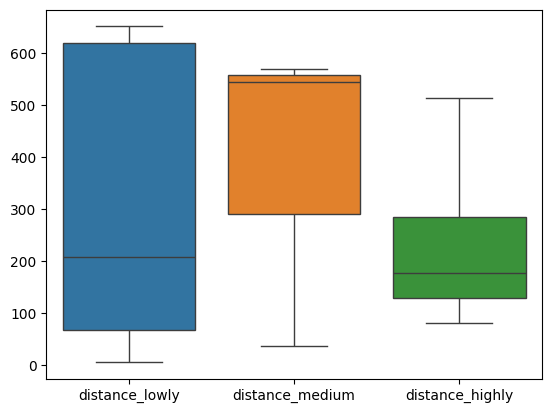

In [64]:
sns.boxplot(paste_distance, showfliers=False)

# GPSA

In [ ]:
result_dir = simu_dataset_dir+'gpsa_results/'

In [53]:
gpsa_distance = pd.DataFrame()
for level in ['lowly', 'medium', 'highly']:
    distance = pd.read_csv(result_dir+level+'_noisy_gpsa_aligned_distance.csv', index_col=0)
    distance.columns = distance.columns+'_'+level
    gpsa_distance = pd.concat([gpsa_distance, distance], axis=1)

FileNotFoundError: [Errno 2] No such file or directory: '/condo/wanglab/shared/wxc/clip/data/human/ST_data/simulation_data/data31_spatial_fresh_frozen_35sample_V19T26-028_C1/paste/highly_noisy_paste_aligned_distance.csv'

In [54]:
gpsa_distance

,distance_lowly,distance_medium
/condo/wanglab/shared/wxc/clip/data/human/ST_data/simulation_data/data31_spatial_fresh_frozen_35sample_V19T26-028_C1/adata_layer_1_nb0.03_ang3.53_cut0.02.h5ad,624.870893,NaN
/condo/wanglab/shared/wxc/clip/data/human/ST_data/simulation_data/data31_spatial_fresh_frozen_35sample_V19T26-028_C1/adata_layer_1_nb0.01_ang-3.53_cut0.02.h5ad,332.757243,NaN
/condo/wanglab/shared/wxc/clip/data/human/ST_data/simulation_data/data31_spatial_fresh_frozen_35sample_V19T26-028_C1/adata_layer_1_nb0.01_ang-0.65_cut0.01.h5ad,70.457076,NaN
/condo/wanglab/shared/wxc/clip/data/human/ST_data/simulation_data/data31_spatial_fresh_frozen_35sample_V19T26-028_C1/adata_layer_1_nb0.04_ang-4.86_cut0.01.h5ad,626.053720,NaN
/condo/wanglab/shared/wxc/clip/data/human/ST_data/simulation_data/data31_spatial_fresh_frozen_35sample_V19T26-028_C1/adata_layer_1_nb0.01_ang4.45_cut0.03.h5ad,651.339129,NaN
/condo/wanglab/shared/wxc/clip/data/human/ST_data/simulation_data/data31_spatial_fresh_frozen_35sample_V19T26-028_C1/adata_layer_1_nb0.02_ang-1.27_cut0.01.h5ad,82.765519,NaN
/condo/wanglab/shared/wxc/clip/data/human/ST_data/simulation_data/data31_spatial_fresh_frozen_35sample_V19T26-028_C1/adata_layer_1_nb0.03_ang0.54_cut0.02.h5ad,66.380145,NaN
/condo/wanglab/shared/wxc/clip/data/human/ST_data/simulation_data/data31_spatial_fresh_frozen_35sample_V19T26-028_C1/adata_layer_1_nb0.03_ang1.01_cut0.02.h5ad,601.024317,NaN
/condo/wanglab/shared/wxc/clip/data/human/ST_data/simulation_data/data31_spatial_fresh_frozen_35sample_V19T26-028_C1/adata_layer_1_nb0.02_ang-1.59_cut0.01.h5ad,4.323924,NaN
/condo/wanglab/shared/wxc/clip/data/human/ST_data/simulation_data/data31_spatial_fresh_frozen_35sample_V19T26-028_C1/adata_layer_1_nb0.04_ang-0.70_cut0.01.h5ad,43.507016,NaN


/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/sit

<Axes: >

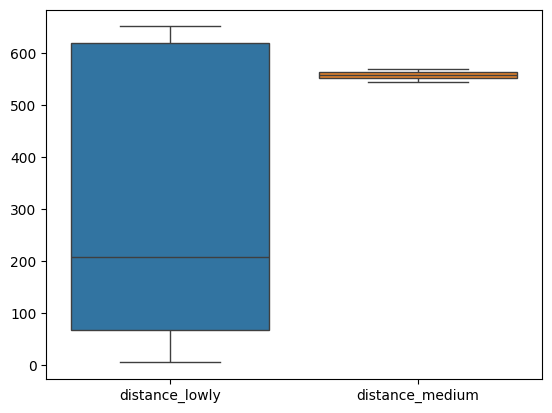

In [55]:
sns.boxplot(gpsa_distance, showfliers=False)